# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [2]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [3]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [4]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [5]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [6]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [7]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [8]:
hist[4]

0

The `Values` method returns the values:

In [9]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [10]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [11]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

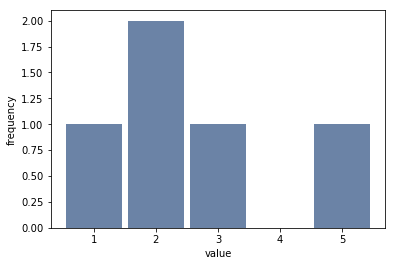

In [12]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [13]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

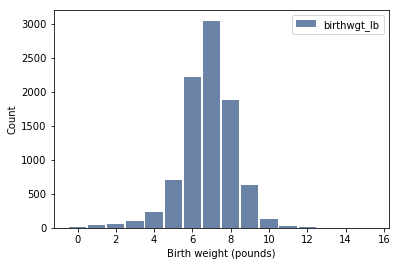

In [14]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [15]:
ages = np.floor(live.agepreg)

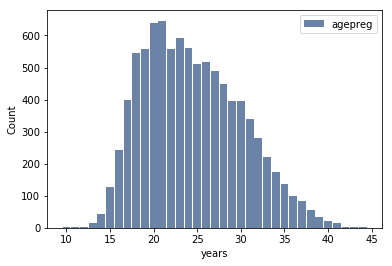

In [16]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

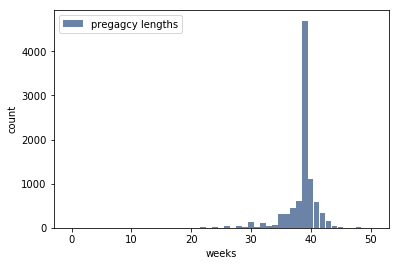

In [17]:
lengths=live.prglngth
hist = thinkstats2.Hist(lengths, label="pregagcy lengths")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="weeks",ylabel= "count")

`Hist` provides smallest, which select the lowest values and their frequencies.

In [18]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


Use `Largest` to display the longest pregnancy lengths.

In [19]:
for weeks, freq in hist.Largest(10):
    print (weeks,freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


From live births, we can selection first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [20]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

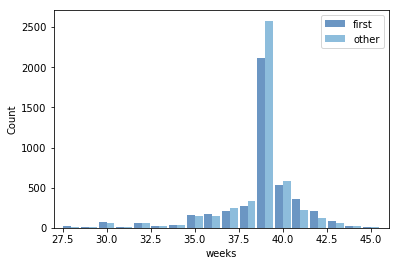

In [21]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [22]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [23]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [24]:
import math
print (math.sqrt(var),std)

2.702343810070593 2.702343810070593


Here's are the mean pregnancy lengths for first babies and others:

In [25]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [26]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [27]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [28]:
cohen = CohenEffectSize(firsts.prglngth,others.prglngth)
print (cohen)

0.0288790446544


## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [31]:
firsts.round_wt_lb

0         9.3125
2         9.6250
5         9.0625
8         8.0625
10        8.3125
11        7.5000
15        8.1875
17        6.8125
19        9.2500
21        6.0625
23        7.2500
26        8.6250
27        7.6250
31        8.5000
32        8.0000
35        5.4375
39        7.6250
42        6.5000
44        8.4375
48        6.6875
52       11.0000
55       10.1250
58        6.6250
60        6.1250
62        7.3750
65        6.3125
67        7.6250
68        7.3125
70        6.8125
72        8.2500
          ...   
13502     6.5000
13506     8.2500
13509     6.0625
13511     6.6875
13516     7.5000
13518     9.3750
13519        NaN
13520     6.0000
13522     6.6250
13525     8.8750
13528     9.3750
13531     7.4375
13537     8.8125
13538     8.1250
13544     6.3125
13547     4.6250
13551     5.8750
13555     6.6250
13559     8.3750
13560     8.3750
13562     8.6250
13565     8.6250
13566     8.0000
13569     6.3125
13573     7.0625
13576     6.9375
13578     6.5000
13581     6.87

In [32]:
firsts.round_wt_lb[i]
a = firsts.round_wt_lb[i]

type(a)


NameError: name 'i' is not defined

In [33]:
print (firsts["totalwgt_lb"])

firsts['round_wt_lb'] =firsts.totalwgt_lb /2

# firsts["round_wt_lb"]=firsts["totalwgt_lb"]

0         8.8125
2         9.1250
5         8.5625
8         7.5625
10        7.8125
11        7.0000
15        7.6875
17        6.3125
19        8.7500
21        5.5625
23        6.7500
26        8.1250
27        7.1250
31        8.0000
32        7.5000
35        4.9375
39        7.1250
42        6.0000
44        7.9375
48        6.1875
52       10.5000
55        9.6250
58        6.1250
60        5.6250
62        6.8750
65        5.8125
67        7.1250
68        6.8125
70        6.3125
72        7.7500
          ...   
13502     6.0000
13506     7.7500
13509     5.5625
13511     6.1875
13516     7.0000
13518     8.8750
13519        NaN
13520     5.5000
13522     6.1250
13525     8.3750
13528     8.8750
13531     6.9375
13537     8.3125
13538     7.6250
13544     5.8125
13547     4.1250
13551     5.3750
13555     6.1250
13559     7.8750
13560     7.8750
13562     8.1250
13565     8.1250
13566     7.5000
13569     5.8125
13573     6.5625
13576     6.4375
13578     6.0000
13581     6.37

/home/ruldo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
diff_mean = firsts.totalwgt_lb.mean()-others.totalwgt_lb.mean()

firsts[wgt_lb_round]=math.floor(firsts.totalwgt_lb)
others[wgt_lb_round]=math.floor(others.totalwgt_lb)

firsts[wgt_lb_round] = first.totalwgt_lb
for i,val in first



var1 = firsts.totalwgt_lb.mean()
var2 = others.totalwgt_lb.mean()

# first_hist = thinkstats2.Hist(firsts.totalwgt_lb, label='first')
# other_hist = thinkstats2.Hist(others.totalwgt_lb, label='other')

first_hist = thinkstats2.Hist(firsts.wgt_lb_round, label='first')
other_hist = thinkstats2.Hist(others.wgt_lb_round, label='other')



width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weight(lb)', ylabel='Count',xlim=[0, 16])




SyntaxError: invalid syntax (<ipython-input-35-b8598af10495>, line 7)

In [ ]:
for i,value in firsts.totalwgt_lb.iteritems():
    print (index, value)
    firsts[wgt_floor_lb][i]=math.floor(firsts.totalwgt_lb[i])

For the next few exercises, we'll load the respondent file:

In [36]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

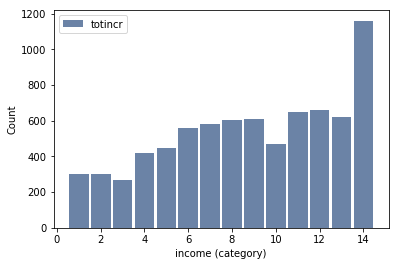

In [37]:
hist = thinkstats2.Hist(resp.totincr)
thinkplot.Hist(hist, label='totincr')
thinkplot.Config(xlabel='income (category)', ylabel='Count')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

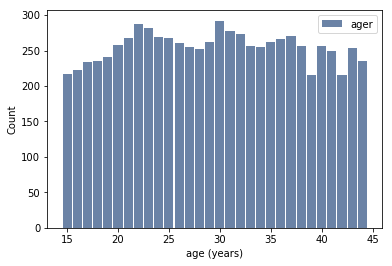

In [38]:
hist = thinkstats2.Hist(resp.ager)
thinkplot.Hist(hist, label='ager')
thinkplot.Config(xlabel='age (years)', ylabel='Count')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

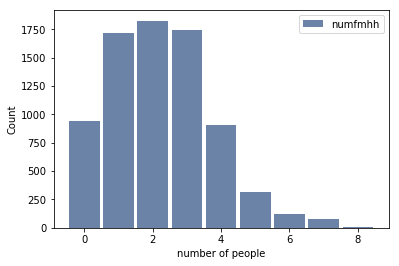

In [40]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Config(xlabel='number of people', ylabel='Count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

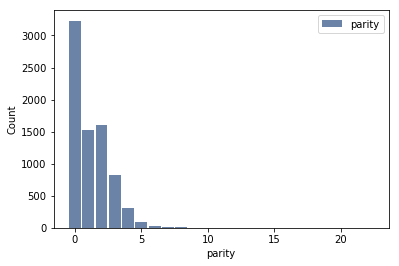

In [41]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Config(xlabel='parity', ylabel='Count')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [43]:
hist.Largest(10)

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

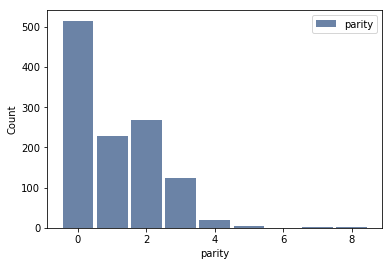

In [44]:
rich = resp[resp.totincr == 14]
hist = thinkstats2.Hist(rich.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Config(xlabel='parity', ylabel='Count')

Find the largest parities for high income respondents.

In [46]:
hist.Largest(10)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [47]:
notrich = resp[resp.totincr < 14]
rich.parity.mean(), notrich.parity.mean()

(1.0758620689655172, 1.2495758136665125)

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [48]:
CohenEffectSize(rich.parity,notrich.parity)

-0.12511855314660611